In [1]:
import re
import pandas as pd

In [2]:
f=open("WhatsApp Chat with Wiss'24 Spons (CH + CT) .txt",'r',encoding='utf-8')

In [3]:
data=f.read()

In [4]:
print(data)

11/04/2023, 22:37 - Messages and calls are end-to-end encrypted. No one outside of this chat, not even WhatsApp, can read or listen to them. Tap to learn more.
11/04/2023, 22:37 - Matta Rohit created group "Wiss'24 Spons (CH + CT) "
11/04/2023, 22:37 - Matta Rohit added you
11/04/2023, 22:38 - You're now an admin
11/04/2023, 22:43 - Matta Rohit: On behalf of all the Core heads, I would like to take the opportunity to welcome the Spons Core Team into the 14th edition of Wissenaire ❤✨
14/04/2023, 18:16 - Rushikesh Reddy: Follow this link to join my WhatsApp group: https://chat.whatsapp.com/I6IYlR2Awi91t5kc4gGhie
14/04/2023, 19:28 - Matta Rohit: @919381811060 , make sure every spons CT member joins this group, reply to this msg once done.
14/04/2023, 20:20 - Thanvi Reddy Ct: Done bhaiya.
15/04/2023, 15:39 - Rushikesh Reddy: How many of you filled Google form for sg ??
React to this message ASAP
15/04/2023, 15:42 - Matta Rohit: If you have any queries/confusions regarding CST or SGs, feel 

In [5]:
pattern='\d{1,2}/\d{1,2}/\d{2,4},\s\d{1,2}:\d{2}\s-\s'

In [6]:
messages = re.split(pattern,data)[1:]
messages

['Messages and calls are end-to-end encrypted. No one outside of this chat, not even WhatsApp, can read or listen to them. Tap to learn more.\n',
 'Matta Rohit created group "Wiss\'24 Spons (CH + CT) "\n',
 'Matta Rohit added you\n',
 "You're now an admin\n",
 'Matta Rohit: On behalf of all the Core heads, I would like to take the opportunity to welcome the Spons Core Team into the 14th edition of Wissenaire ❤✨\n',
 'Rushikesh Reddy: Follow this link to join my WhatsApp group: https://chat.whatsapp.com/I6IYlR2Awi91t5kc4gGhie\n',
 'Matta Rohit: @919381811060 , make sure every spons CT member joins this group, reply to this msg once done.\n',
 'Thanvi Reddy Ct: Done bhaiya.\n',
 'Rushikesh Reddy: How many of you filled Google form for sg ??\nReact to this message ASAP\n',
 'Matta Rohit: If you have any queries/confusions regarding CST or SGs, feel free to approach any current SG in Spons.\n',
 'Matta Rohit: Hope you know who all are SGs over here 🙃\n',
 "Rushikesh Reddy: I want most of y

In [7]:
dates=re.findall(pattern,data)
dates

['11/04/2023, 22:37 - ',
 '11/04/2023, 22:37 - ',
 '11/04/2023, 22:37 - ',
 '11/04/2023, 22:38 - ',
 '11/04/2023, 22:43 - ',
 '14/04/2023, 18:16 - ',
 '14/04/2023, 19:28 - ',
 '14/04/2023, 20:20 - ',
 '15/04/2023, 15:39 - ',
 '15/04/2023, 15:42 - ',
 '15/04/2023, 15:44 - ',
 '15/04/2023, 15:50 - ',
 '16/04/2023, 00:20 - ',
 '16/04/2023, 00:24 - ',
 '16/04/2023, 00:40 - ',
 '16/04/2023, 00:47 - ',
 '16/04/2023, 00:56 - ',
 '17/04/2023, 00:40 - ',
 '21/04/2023, 17:19 - ',
 '21/04/2023, 17:37 - ',
 '21/04/2023, 19:19 - ',
 '21/04/2023, 19:52 - ',
 '21/04/2023, 23:57 - ',
 '22/04/2023, 00:37 - ',
 '22/04/2023, 00:39 - ',
 '22/04/2023, 08:54 - ',
 '22/04/2023, 15:00 - ',
 '22/04/2023, 15:02 - ',
 '22/04/2023, 17:39 - ',
 '22/04/2023, 17:47 - ',
 '23/04/2023, 12:03 - ',
 '23/04/2023, 12:09 - ',
 '23/04/2023, 12:34 - ',
 '26/04/2023, 09:36 - ',
 '26/04/2023, 09:38 - ',
 '30/04/2023, 01:01 - ',
 '30/04/2023, 01:04 - ',
 '30/04/2023, 02:01 - ',
 '08/05/2023, 16:40 - ',
 '09/05/2023, 10:42 - ',


In [8]:
df= pd.DataFrame({'user_message': messages, 'message_date': dates})
# convert message_date type
df['message_date'] = pd.to_datetime(df['message_date'], format='%d/%m/%Y, %H:%M - ')

df.rename(columns={'message_date': 'date'}, inplace=True)

df.head()

,user_message,date
0,Messages and calls are end-to-end encrypted. N...,2023-04-11 22:37:00
1,"Matta Rohit created group ""Wiss'24 Spons (CH +...",2023-04-11 22:37:00
2,Matta Rohit added you\n,2023-04-11 22:37:00
3,You're now an admin\n,2023-04-11 22:38:00
4,"Matta Rohit: On behalf of all the Core heads, ...",2023-04-11 22:43:00


In [9]:
df.shape

(1586, 2)

In [10]:
users = []
messages = []
for message in df['user_message']:
    entry = re.split('([\w\W]+?):\s', message)
    if entry[1:]:  # user name
        users.append(entry[1])
        messages.append(" ".join(entry[2:]))
    else:
        users.append('group_notification')
        messages.append(entry[0])
        
df['user']=users
df['message']=messages
df.drop(columns=['user_message'],inplace=True)

df.head()

,date,user,message
0,2023-04-11 22:37:00,group_notification,Messages and calls are end-to-end encrypted. N...
1,2023-04-11 22:37:00,group_notification,"Matta Rohit created group ""Wiss'24 Spons (CH +..."
2,2023-04-11 22:37:00,group_notification,Matta Rohit added you\n
3,2023-04-11 22:38:00,group_notification,You're now an admin\n
4,2023-04-11 22:43:00,Matta Rohit,"On behalf of all the Core heads, I would like ..."


In [11]:
df['year'] = df['date'].dt.year

In [12]:
df.head()

,date,user,message,year
0,2023-04-11 22:37:00,group_notification,Messages and calls are end-to-end encrypted. N...,2023
1,2023-04-11 22:37:00,group_notification,"Matta Rohit created group ""Wiss'24 Spons (CH +...",2023
2,2023-04-11 22:37:00,group_notification,Matta Rohit added you\n,2023
3,2023-04-11 22:38:00,group_notification,You're now an admin\n,2023
4,2023-04-11 22:43:00,Matta Rohit,"On behalf of all the Core heads, I would like ...",2023


In [13]:
df['month'] = df['date'].dt.month_name()
df['day'] = df['date'].dt.day

In [14]:
df['hour'] = df['date'].dt.hour
df['minute'] = df['date'].dt.minute

df.head()

,date,user,message,year,month,day,hour,minute
0,2023-04-11 22:37:00,group_notification,Messages and calls are end-to-end encrypted. N...,2023,April,11,22,37
1,2023-04-11 22:37:00,group_notification,"Matta Rohit created group ""Wiss'24 Spons (CH +...",2023,April,11,22,37
2,2023-04-11 22:37:00,group_notification,Matta Rohit added you\n,2023,April,11,22,37
3,2023-04-11 22:38:00,group_notification,You're now an admin\n,2023,April,11,22,38
4,2023-04-11 22:43:00,Matta Rohit,"On behalf of all the Core heads, I would like ...",2023,April,11,22,43


In [15]:
df[df['user']=='Yashna'].shape

(4, 8)

In [16]:
words=[]
for message in df['message']:
    words.extend(message.split())

In [17]:
len(words)

16252

In [18]:
df[df['message'] == '<Media omitted>\n'].shape[0]

196

In [103]:
pip install urlextract

Note: you may need to restart the kernel to use updated packages.


In [19]:
from urlextract import URLExtract
extractor=URLExtract()
urls = extractor.find_urls('google.com https://yahoo.com www.mangabuddy.com')
urls

['google.com', 'https://yahoo.com', 'www.mangabuddy.com']

In [20]:
links=[]
for message in df['message']:
    #print(message)
    links.extend(extractor.find_urls(message))

In [21]:
len(links)

42

In [22]:
df

,date,user,message,year,month,day,hour,minute
0,2023-04-11 22:37:00,group_notification,Messages and calls are end-to-end encrypted. N...,2023,April,11,22,37
1,2023-04-11 22:37:00,group_notification,"Matta Rohit created group ""Wiss'24 Spons (CH +...",2023,April,11,22,37
2,2023-04-11 22:37:00,group_notification,Matta Rohit added you\n,2023,April,11,22,37
3,2023-04-11 22:38:00,group_notification,You're now an admin\n,2023,April,11,22,38
4,2023-04-11 22:43:00,Matta Rohit,"On behalf of all the Core heads, I would like ...",2023,April,11,22,43
...,...,...,...,...,...,...,...,...
1581,2024-04-16 11:52:00,Sethu Raman,Happy birthday @919347494487 anna🥳🥳\n,2024,April,16,11,52
1582,2024-04-16 16:05:00,Nisarg Jnr,Happy birthday @919347494487 bhaiya🥳🥳\n,2024,April,16,16,5
1583,2024-04-16 17:42:00,Ghanshyam Gohil Jnr,Happy Birthday @919347494487 bhaiya🥳🥳\n,2024,April,16,17,42
1584,2024-09-05 17:35:00,Matta Rohit,"Guys,\n\nIf you're worried/stressed/feeling do...",2024,September,5,17,35


In [23]:
x=df['user'].value_counts().head()

In [24]:
import matplotlib.pyplot as plt

In [25]:
name=x.index
count=x.values

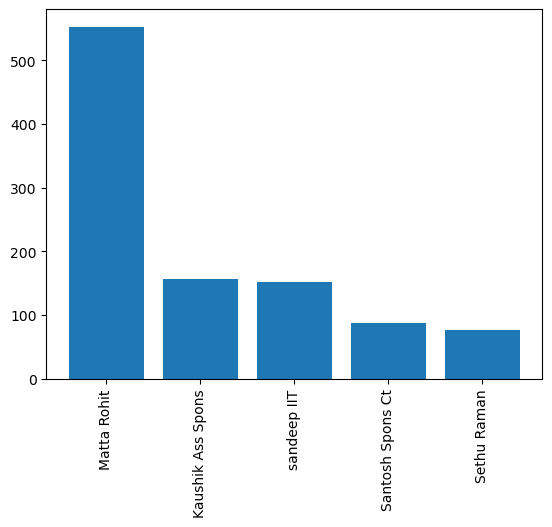

In [26]:
plt.bar(name,count)
plt.xticks(rotation='vertical')
plt.show()

In [27]:
words = []
for message in df['message']:
    print(message)

Messages and calls are end-to-end encrypted. No one outside of this chat, not even WhatsApp, can read or listen to them. Tap to learn more.

Matta Rohit created group "Wiss'24 Spons (CH + CT) "

Matta Rohit added you

You're now an admin

On behalf of all the Core heads, I would like to take the opportunity to welcome the Spons Core Team into the 14th edition of Wissenaire ❤✨

 Follow this link to join my WhatsApp group https://chat.whatsapp.com/I6IYlR2Awi91t5kc4gGhie

@919381811060 , make sure every spons CT member joins this group, reply to this msg once done.

Done bhaiya.

How many of you filled Google form for sg ??
React to this message ASAP

If you have any queries/confusions regarding CST or SGs, feel free to approach any current SG in Spons.

Hope you know who all are SGs over here 🙃

I want most of you to fill because there won't be much work, hardly the 1 month in which juniors arrives. Many juniors will know you and their parents too and you guys will enjoy the work. 

*So 

In [36]:
df['month_num']=df['date'].dt.month

timeline = df.groupby(['year', 'month_num', 'month']).count()['message'].reset_index()

time = []
for i in range(timeline.shape[0]):
    time.append(timeline['month'][i] + "-" + str(timeline['year'][i]))

timeline['time'] = time

In [38]:
timeline

,year,month_num,month,message,time
0,2023,4,April,38,April-2023
1,2023,5,May,43,May-2023
2,2023,6,June,28,June-2023
3,2023,7,July,88,July-2023
4,2023,8,August,141,August-2023
5,2023,9,September,99,September-2023
6,2023,10,October,337,October-2023
7,2023,11,November,71,November-2023
8,2023,12,December,71,December-2023
9,2024,1,January,39,January-2024


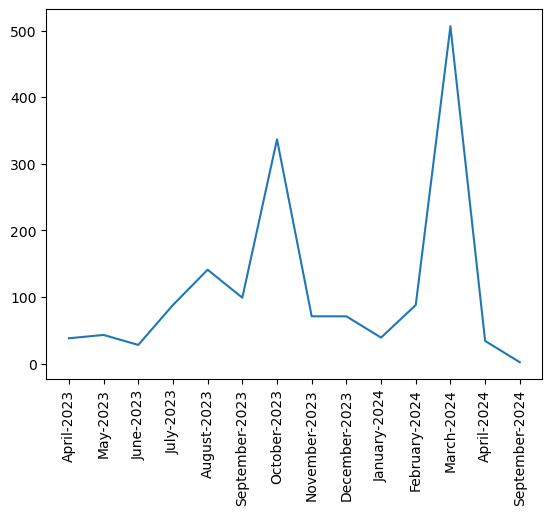

In [41]:
plt.plot(timeline['time'],timeline['message'])
plt.xticks(rotation='vertical')
plt.show()

In [48]:
df['only_date'] = df['date'].dt.date

daily_timeline=df.groupby('only_date').count()['message'].reset_index()


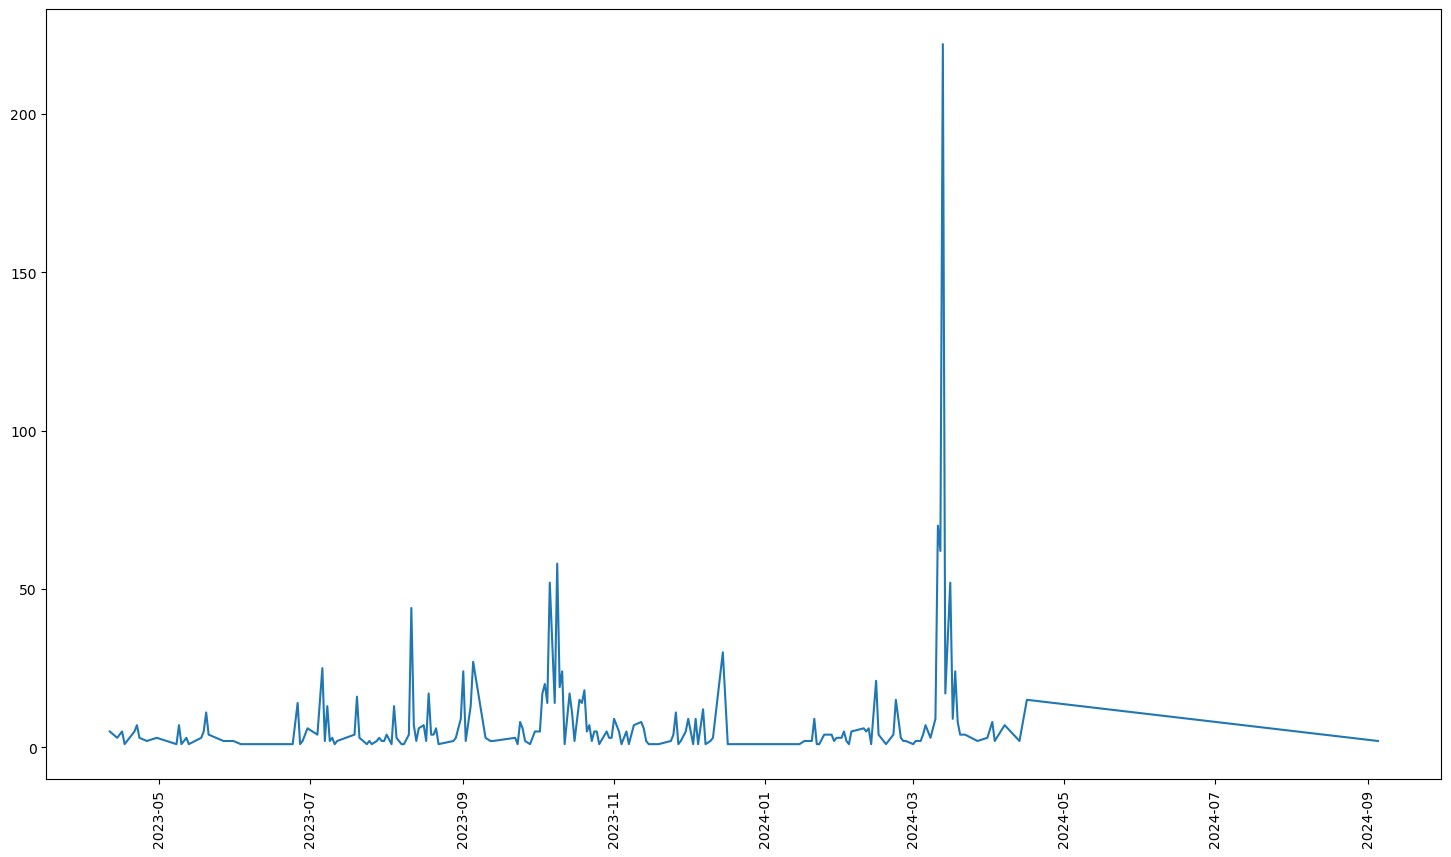

In [51]:
plt.figure(figsize=(18,10))
plt.plot(daily_timeline['only_date'],daily_timeline['message'])
plt.xticks(rotation='vertical')
plt.show()

In [52]:
df['day_name'] = df['date'].dt.day_name()

df['day_name'].value_counts()

Wednesday    341
Friday       283
Monday       265
Tuesday      217
Thursday     167
Saturday     163
Sunday       150
Name: day_name, dtype: int64

In [59]:
period = []
for hour in df[['day_name', 'hour']]['hour']:
    if hour == 23:
        period.append(str(hour) + "-" + str('00'))
    elif hour == 0:
        period.append(str('00') + "-" + str(hour + 1))
    else:
        period.append(str(hour) + "-" + str(hour + 1))

df['period'] = period

In [60]:
df.pivot_table(index='day_name', columns='period', values='message', aggfunc='count').fillna(0)

period,00-1,1-2,10-11,11-12,12-13,13-14,14-15,15-16,16-17,17-18,...,21-22,22-23,23-00,3-4,4-5,5-6,6-7,7-8,8-9,9-10
day_name,,,,,,,,,,,,,,,,,,,,,
Friday,11.0,0.0,3.0,34.0,7.0,18.0,24.0,20.0,13.0,27.0,...,26.0,8.0,22.0,0.0,0.0,1.0,0.0,1.0,11.0,5.0
Monday,21.0,14.0,1.0,5.0,3.0,3.0,5.0,7.0,4.0,9.0,...,50.0,20.0,18.0,0.0,2.0,0.0,0.0,0.0,3.0,8.0
Saturday,8.0,4.0,1.0,5.0,4.0,3.0,2.0,21.0,4.0,36.0,...,6.0,29.0,3.0,1.0,1.0,0.0,0.0,0.0,2.0,0.0
Sunday,13.0,4.0,0.0,11.0,5.0,1.0,2.0,4.0,1.0,7.0,...,11.0,15.0,23.0,2.0,0.0,0.0,1.0,0.0,2.0,4.0
Thursday,10.0,1.0,4.0,11.0,4.0,11.0,6.0,2.0,4.0,12.0,...,14.0,13.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0
Tuesday,46.0,14.0,37.0,9.0,10.0,4.0,3.0,6.0,2.0,8.0,...,18.0,18.0,6.0,0.0,0.0,0.0,0.0,2.0,1.0,15.0
Wednesday,3.0,1.0,12.0,0.0,3.0,144.0,84.0,10.0,5.0,4.0,...,3.0,13.0,7.0,11.0,0.0,0.0,0.0,2.0,0.0,11.0


In [56]:
import pandas as pd

# Define the correct order for the 'period' column
period_order = ['00-1', '1-2', '2-3', '3-4', '4-5', '5-6', '6-7', '7-8', '8-9', '9-10',
                '10-11', '11-12', '12-13', '13-14', '14-15', '15-16', '16-17', '17-18',
                '18-19', '19-20', '20-21', '21-22', '22-23', '23-00']

# Convert 'period' column to categorical with the correct order
df['period'] = pd.Categorical(df['period'], categories=period_order, ordered=True)

# Create the pivot table, now the periods will be in the correct order
df.pivot_table(index='day_name', columns='period', values='message', aggfunc='count').fillna(0)


period,00-1,1-2,2-3,3-4,4-5,5-6,6-7,7-8,8-9,9-10,...,14-15,15-16,16-17,17-18,18-19,19-20,20-21,21-22,22-23,23-00
day_name,,,,,,,,,,,,,,,,,,,,,
Friday,11,0,2,0,0,1,0,1,11,5,...,24,20,13,27,9,18,23,26,8,22
Monday,21,14,2,0,2,0,0,0,3,8,...,5,7,4,9,5,14,71,50,20,18
Saturday,8,4,0,1,1,0,0,0,2,0,...,2,21,4,36,22,5,6,6,29,3
Sunday,13,4,7,2,0,0,1,0,2,4,...,2,4,1,7,24,4,9,11,15,23
Thursday,10,1,1,0,0,0,0,0,0,6,...,6,2,4,12,13,29,17,14,13,9
Tuesday,46,14,2,0,0,0,0,2,1,15,...,3,6,2,8,0,12,4,18,18,6
Wednesday,3,1,1,11,0,0,0,2,0,11,...,84,10,5,4,17,1,9,3,13,7


In [148]:
df = round((df['user'].value_counts() / df.shape[0]) * 100, 2).reset_index().rename(
        columns={'index': 'name', 'user': 'percent'})

df

,name,percent
0,Matta Rohit,34.87
1,Kaushik Ass Spons,9.84
2,sandeep IIT,9.58
3,Santosh Spons Ct,5.55
4,Sethu Raman,4.79
5,Sushma,3.22
6,Harshita ECE,3.15
7,Sai Roop Jnr,2.65
8,Jessysagar,2.52
9,Sohan Spons Ass,2.52
